In [29]:
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt

In [32]:
def load_random_dataset(simulator_type):
    if not (simulator_type == "machine-of-death" or simulator_type == "saving-john"):
        raise ValueError("not a simulator...")
        
        
    df = pd.read_csv(f'../artifacts/random-{simulator_type}-rewards.csv', names=['rewards'])
    df = df.reset_index().rename(columns={"index": "episode"})
    return df

In [33]:
def load_machine_of_death(param, episodes, dataset_type="test"):
    df = pd.read_csv(f'data/{dataset_type}_mod_param{param}_ep{episodes}.csv', names=['rewards'])
    df = df.reset_index().rename(columns={"index": "episode"})
    return df

In [34]:
random_dataset = load_random_dataset("machine-of-death")
mod_param1 = load_machine_of_death(param=2, episodes=4000)
mod_param2 = load_machine_of_death(param=1, episodes=8192)
mod_param2 = mod_param2[:4096]

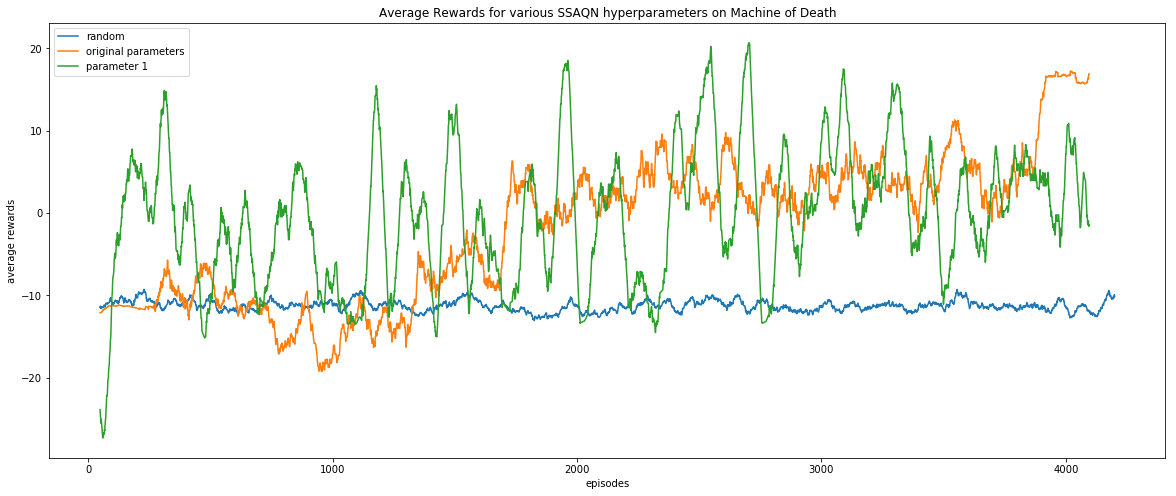

In [35]:
fig, ax = plt.subplots(figsize=(20, 8))
ax.plot(random_dataset['rewards'].rolling(50).mean(), label="random")
ax.plot(mod_param2['rewards'].rolling(50).mean(), label="original parameters")
ax.plot(mod_param1['rewards'].rolling(50).mean(), label="parameter 1")
plt.xlabel("episodes")
plt.ylabel("average rewards")
plt.title("Average Rewards for various SSAQN hyperparameters on Machine of Death")
ax.legend()

In [36]:
random_dataset = load_random_dataset("machine-of-death")
mod_test = load_machine_of_death(param=1, episodes=8192)
mod_train = load_machine_of_death(param=1, episodes=8192, dataset_type="train")

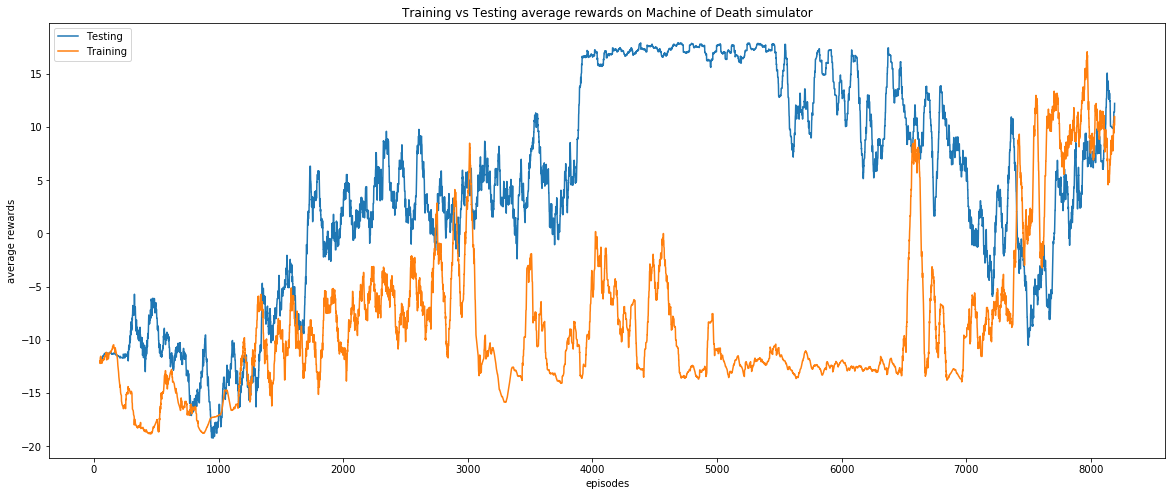

In [37]:
fig, ax = plt.subplots(figsize=(20, 8))
ax.plot(mod_test['rewards'].rolling(50).mean(), label="Testing")
ax.plot(mod_train['rewards'].rolling(50).mean(), label="Training")
plt.xlabel("episodes")
plt.ylabel("average rewards")
plt.title("Training vs Testing average rewards on Machine of Death simulator")
ax.legend()

In [23]:
random_dataset = load_random_dataset("machine-of-death")
mod_param1 = load_machine_of_death(param=1, episodes=8192)
mod_param2 = load_machine_of_death(param=2, episodes=8192)

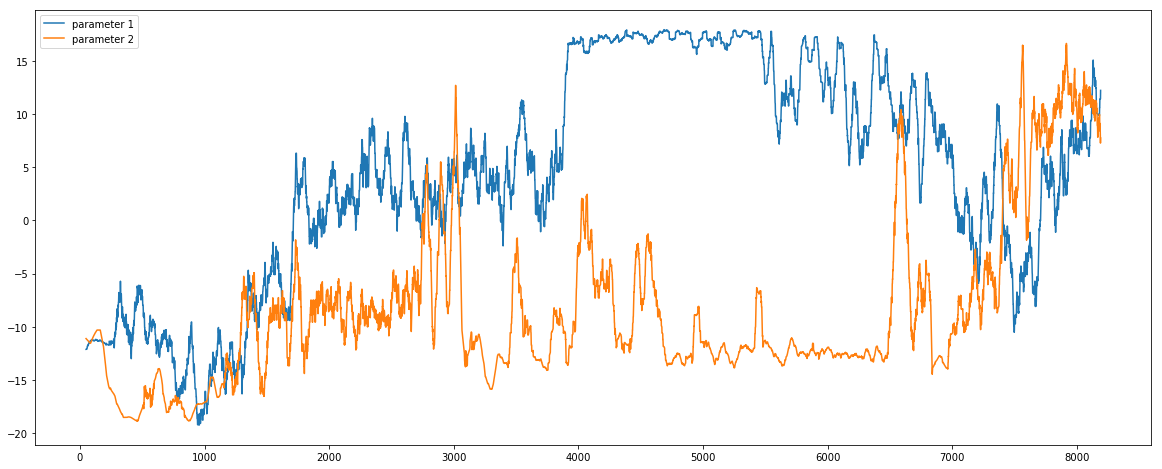

In [26]:
fig, ax = plt.subplots(figsize=(20, 8))
ax.plot(mod_param1['rewards'].rolling(50).mean(), label="parameter 1")
ax.plot(mod_param2['rewards'].rolling(50).mean(), label="parameter 2")
ax.legend()

In [27]:
mod_param2

,episode,rewards
0,0,-11.1
1,1,-11.1
2,2,-11.1
3,3,-10.9
4,4,-10.9
...,...,...
8187,8187,12.1
8188,8188,-11.8
8189,8189,-11.8
8190,8190,-11.8
